In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

<center>

# **Double Pendulum**

<center>

In this Notebook we will use Lagrangian Mechanics to deduce the equations of motion of the two masses involved in the double pendulum (using as tools SymPy and SciPy to solve symbolically and lambdify our solutions). Then a few 2D plots will be created to ilustrate the relation between angles and angular velocity. Finally a 2D animation of the double pendulum will be created.

<center>

![Centered Pendulim](Double-Pendulum.svg)

<center>

*Fig. I Double pendulum*

## **Solving the Double Pendulum**

To set up the most important part, deducing the equations of motion we will follow this three steps:

1. Write down kinematics constraints
2. Write down the Lagrangian of the system
3. Solve the Euler-Lagrange equation

### **1. Write down kinematics constraints**

For the mass number one ($m_1$):

\begin{aligned}
    x_1 &= l_1 \sin(\theta_1) \hspace{2mm} \Rightarrow \hspace{2mm} \dot{x_1} = \dot{\theta_1} l_1 \cos(\theta_1) \\
    y_1 &= l_1 \cos(\theta_1) \hspace{1.6mm} \Rightarrow \hspace{2mm} \dot{y_1} = -\dot{\theta_1} l_1 \sin(\theta_1)
\end{aligned}

Then for mass number two ($m_2$):

\begin{aligned}
    x_2 &= l_1 \sin(\theta_1) + l_2 \sin(\theta_2) \hspace{2mm} \Rightarrow \hspace{2mm} \dot{x_2} = \dot{\theta_1} l_1 \cos(\theta_1) + \dot{\theta_2} l_2 \cos(\theta_2) \\
    y_2 &= l_1 \cos(\theta_1) + l_2 \cos(\theta_2) \hspace{1.3mm} \Rightarrow \hspace{2mm} \dot{y_2} = -\dot{\theta_1} l_1 \sin(\theta_1)- \dot{\theta_2} l_2 \sin(\theta_2)
\end{aligned}

In [ ]:
# Define symbols and variables

t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m_1 m_2', real= True, positive= True)
l1, l2 = smp.symbols('l_1 l_2', real= True, positive= True)

# Define angles as functions of time

theta1, theta2 = smp.symbols(r'\theta_1 \theta_2', cls= smp.Function)
theta1 = theta1(t)
theta2 = theta2(t)

# Define the derivatives for later use

theta1_d = smp.diff(theta1, t, 1)
theta1_dd = smp.diff(theta1, t, 2)

theta2_d = smp.diff(theta2, t, 1)
theta2_dd = smp.diff(theta2, t, 2)

# Define the kinematic constraints

x1 = l1*smp.sin(theta1)
y1 = -l1*smp.cos(theta1)
x1_d = smp.diff(x1, t, 1)
y1_d = smp.diff(y1, t, 1)

x2 = l1*smp.sin(theta1) + l2*smp.sin(theta2)
y2 = -l1*smp.cos(theta1) - l2*smp.cos(theta2)
x2_d = smp.diff(x2, t, 1)
y2_d =smp.diff(y2, t, 1)

### **2. Write down the Lagrangian of the system**

The Lagrangian is defines has the difference between the kinetic and potential energy of the system

\begin{aligned}
    L = T - V 
\end{aligned}

where

\begin{aligned}
    T = \frac{1}{2} m_i v_i^2 \\
    V = m_i g h_i
\end{aligned}

For the mass number one ($m_1$):

\begin{gathered}
    T_1 = \frac{1}{2} m_1 (\dot{x_1}^2 + \dot{y_1}^2) \\
    V_1 = m_1 g \hspace{0.2mm} y_1
\end{gathered}

Then for mass number two ($m_2$):

\begin{gathered}
    T_2 = \frac{1}{2} m_2 (\dot{x_2}^2 + \dot{y_2}^2) \\
    V_2 = m_2 g \hspace{0.2mm} y_2
\end{gathered}

Finally, the Lagrangian of the system is the sum of the Lagrangian of each mass, such that

\begin{gathered}
    L = (T_1 + T_2) - (V_1 + V_2) \\
    = \frac{1}{2}(m_1(\dot{x_1}^2 + \dot{y_1}^2) + m_2 (\dot{x_2}^2 + \dot{y_2}^2)) \\
    - m_1 g \hspace{0.2mm} y_1 - m_2 g \hspace{0.2mm} y_2 
\end{gathered}



In [107]:
# Define kinetic energy 

T1 = (1/2) * m1* (x1_d**2 + y1_d**2)
T2 = (1/2) * m2* (x2_d**2 + y2_d**2)
T = T1 + T2

# Define potential energy

V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2 

# Define the Lagrangian

L = T - V

### **3. Solve the Euler-Lagrange equations**

Since the double pendulum system has two generalized coordinates ($\theta_1$ and $\theta_2$) there are two Euler-Lagrange equations

\begin{gathered}
    \frac{\partial L}{\partial\theta_1}-\frac{d}{dt}\frac{\partial L}{\partial\dot{\theta_1}}=0 \\
    \frac{\partial L}{\partial\theta_2}-\frac{d}{dt}\frac{\partial L}{\partial\dot{\theta_2}}=0
\end{gathered}

This pair of equations, when solved, gives the equation of motion related to the corresponding generalized coordinate.

In [108]:
# Define each Euler-Lagrange equation

LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t).simplify()
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t).simplify()

# Solve the system of equations

sols = smp.solve([LE1, LE2], (theta1_dd, theta2_dd))

So now we have two second order ODEs, to solve them in Python we must convert them to two systems of equations, each one containing of two first order ODEs. To do this we perform the following substitutions 

\begin{gathered}
    \dot{\theta_1} = z_1 \hspace{3mm} \Longrightarrow \hspace{3mm} \dot{z_1} = \ddot{\theta_1} \\ 
    \dot{\theta_2} = z_2 \hspace{3mm} \Longrightarrow \hspace{3mm} \dot{z_2} = \ddot{\theta_2} 
\end{gathered}

Now, the ODE solver we are going to use (SciPy's *solve_ivp*) requires us to define a vector $\vec{S}=(\theta_1,z_1,\theta_2,z_2)$. Then the solver takes this vector and $\text{t}$ and returns $\frac{d\vec{S}}{dt}$, essentialy solving both first order system of equations previously defined.

The solver, being a numerical solver, handles numerical functions. We need to convert our symbolical expressions using the *lamdify* function that SymPy provides.


In [109]:
# The parameters of smp.lambdify() are, first arguments of the function, then the expression to lambdify

# Convert the derivative of z1 and z2, i.e the second derivative of theta_1 and theta_2

th1_dtt = smp.lambdify((g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sols[theta1_dd])
th2_dtt = smp.lambdify((g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sols[theta2_dd])

Finally we have to set up the code to use *solve_ivp* (write the function that defines the system of ODEs, initial conditions and time interval). This solver uses as default the 4th order Runge-Kutta method (RK4).

Euler method approximates a function by evaluating the derivative function at the beginning of a time step using the following rule

$$y_{n+1} = y_n + hf(t_n, y_n)$$

where $f(t_n, y_n)$ is the value of the derivative function at $t_n$.

The RK4 method insted of using just the value of $f(t_n, y_n)$ it uses four different evaluations at carefully chosen points within the time step to refine the estimation, then it computes a weighted average of the four values

\begin{gathered}
k_1 =hf(t_n,y_n)\\
k_2=hf(t_n+\frac{h}{2},y_n+\frac{k_1}{2})\\
k_3=hf=(t_n+\frac{h}{2},y_n+\frac{k_2}{2})\\
k_4=hf(t_n+h,y_n+k_3)\\
y_{n+1}=y_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{gathered}

The solver *solve_ivp's* uses an variant with adaptive step-size, this is needed to reduce the error in systems where the behaviour changes dramatically over time, cases where the slope of the solution is steep or changes rapidly. The solver does this by estimating the local error at each step by computing two approximations, the actual approximation and one with a larger order numerical method like RK5, the difference betweem them is the local error, based on the value the step-size is increased or decreased.

In [156]:
# Define parameters, time interval, time array and initial coditions

g_val = 9.81
m1_val = 3
m2_val = 1
l1_val = 1.5
l2_val = 1

# Define function that describes the system of ODE

def sys_of_ode(t, S, g, m1, m2, l1, l2):
    
    theta1, theta1_d, theta2, theta2_d = S

    theta1_dd = th1_dtt(g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d)
    theta2_dd = th2_dtt(g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d)

    return [theta1_d, theta1_dd, theta2_d, theta2_dd]

a, b = 0, 15
t = np.linspace(0, 15, 1001)

# Initial conditions: Angle_1, Velocity_1, Angle_2, Velocity_2

init_cond = [np.deg2rad(120), 1, np.pi/4, 0] 

# Solve the system of ODEs using solve_ivp

solution = solve_ivp(
        fun = sys_of_ode,
        t_span = (a, b),
        y0 = init_cond,
        t_eval = t,
        args = (g_val, m1_val, m2_val, l1_val, l2_val),
)

# Extract the data from solution

t_sol = solution.t

theta1 = solution.y[0]
theta2 = solution.y[2]

theta1_d = solution.y[1]
theta2_d = solution.y[3]

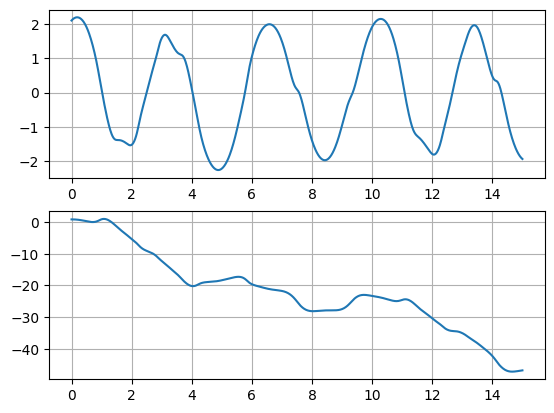

In [157]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1)

# Figure for theta1 vs time

axis_1 = fig.add_subplot(gs[0, 0])
axis_1.plot(t_sol, theta1)  
axis_1.grid()

# Figure for theta2 vs time     

axis_2 = fig.add_subplot(gs[1,0])
axis_2.plot(t_sol, theta2)
axis_2.grid()

In [158]:
# Function to get the coordinates of the masses

def pend_pos(theta1, theta2):
    return (l1_val*np.sin(theta1),
            -l1_val*np.cos(theta1),
            l1_val*np.sin(theta1) + l2_val*np.sin(theta2),
            -l1_val*np.cos(theta1) - l2_val*np.cos(theta2)
            )

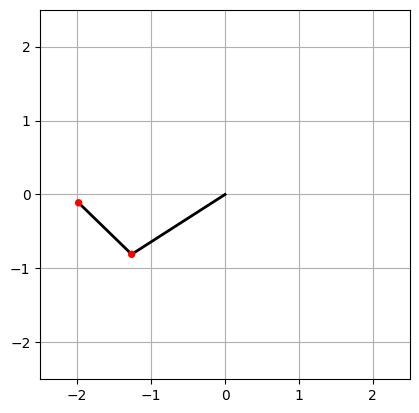

In [161]:
# Create the figure of the animation, the line for the pendulum and the circle for the mass

fig = plt.figure()
axis = fig.add_subplot(aspect='equal')
axis.set_xlim(-(l1_val+l2_val), (l1_val+l2_val))
axis.set_ylim(-(l1_val+l2_val), (l1_val+l2_val))
axis.grid()

x1_0, y1_0, x2_0, y2_0 = pend_pos(init_cond[0], init_cond[2])
line1, = axis.plot([0, x1_0], [0, y1_0], lw=2, c='k')
line2, = axis.plot([x1_0, x2_0], [y1_0, y2_0], lw=2, c='k')
hinge_circle = axis.add_patch(plt.Circle((0, 0), 0.015, fc='k', zorder=3))
circle1 = axis.add_patch(plt.Circle((x1_0, y1_0), 0.05, fc='r', zorder=3))
circle2 = axis.add_patch(plt.Circle((x2_0, y2_0), 0.05, fc='r', zorder=3))

# Define function to update data each frame (animate plot)

def update_anim(i):
    x1, y1, x2, y2 = pend_pos(theta1[i], theta2[i])
    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])
    circle1.set_center((x1, y1))
    circle2.set_center((x2, y2))

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                frames = 600
)

plt.rcParams['animation.ffmpeg_path'] = 'C:\\ProgramData\\chocolatey\\lib\\ffmpeg\\tools\\ffmpeg\\bin\\ffmpeg.exe'
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save('double_pendulum_anim.mp4', writer=ffmpeg_writer)

plt.show()